In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d engymohamed90/the-car-typesuv-sedan-hachback-truck

 97% 689M/710M [00:07<00:00, 113MB/s]
100% 710M/710M [00:07<00:00, 95.2MB/s]


In [3]:
! unzip /content/the-car-typesuv-sedan-hachback-truck.zip

Archive:  /content/the-car-typesuv-sedan-hachback-truck.zip
  inflating: the car type(SUV, sedane, Hachback, truck)/test/Hatchback/00042_Volkswagen-Golf-Hatchback-1991_jpg.rf.a9ca5d436eefa71d5842b1e825621cf7.jpg  
  inflating: the car type(SUV, sedane, Hachback, truck)/test/Hatchback/00199_Volkswagen-Golf-Hatchback-1991_jpg.rf.aa9abda4df4ba2878e4239d3151d6323.jpg  
  inflating: the car type(SUV, sedane, Hachback, truck)/test/Hatchback/00442_Volkswagen-Golf-Hatchback-2012_jpg.rf.3875274cd997830c6fdf7d689419e48b.jpg  
  inflating: the car type(SUV, sedane, Hachback, truck)/test/Hatchback/00992_Nissan-Leaf-Hatchback-2012_jpg.rf.df0af170eb76ea644c2237e1293c8636.jpg  
  inflating: the car type(SUV, sedane, Hachback, truck)/test/Hatchback/01080_Volkswagen-Beetle-Hatchback-2012_jpg.rf.64beb3905a0631859d6a9fdedc5f4ce5.jpg  
  inflating: the car type(SUV, sedane, Hachback, truck)/test/Hatchback/01587_Nissan-Juke-Hatchback-2012_jpg.rf.b98d6a1bf323df5a0313fc25e484bb5b.jpg  
  inflating: the car t

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

show random images from train data

In [ ]:
data_path = '/content/the car type(SUV, sedane, Hachback, truck)/train'

In [ ]:
class_name = os.listdir(data_path)
print(class_name)

['Sedan', 'Hatchback', 'truck', 'SUV']


In [ ]:
def get_count(each_class):
    return len(os.listdir(data_path + '/' + each_class))

In [ ]:
for each_class in class_name:
    print("Number of samples in {} category {}".format(each_class, get_count(each_class)))

Number of samples in SUV category 849
Number of samples in Hatchback category 703
Number of samples in Sedan category 731
Number of samples in truck category 749


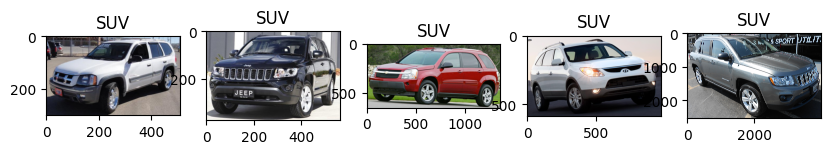

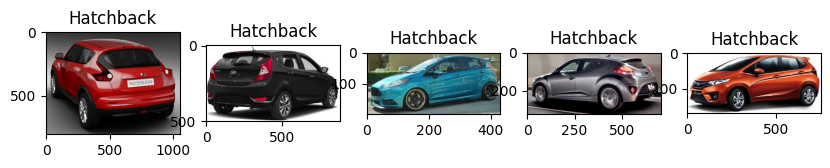

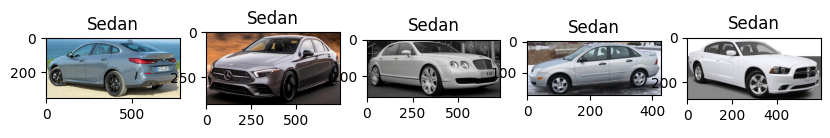

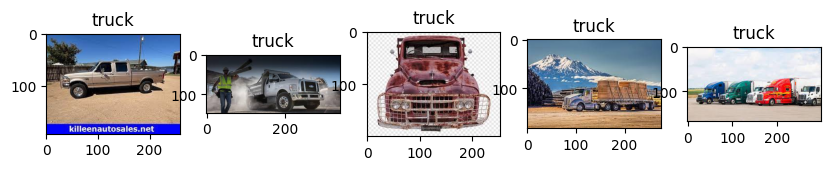

In [ ]:
directory=os.listdir(data_path)
for each in directory:
    plt.figure(figsize=(10, 10))
    currentFolder = data_path + '/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = data_path + '/' + each + "/" + file
        img=mpimg.imread(fullpath)
        ax=plt.subplot(1,5,i+1)
        ax.set_title(each)
        plt.imshow(img)

Reading data

In [5]:
train_data_generation = ImageDataGenerator(rescale=1./255,

    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
                                           )

training_set=train_data_generation.flow_from_directory('/content/the car type(SUV, sedane, Hachback, truck)/train',
                                                       target_size=(224,224),
                                                       batch_size= 32,
                                                       class_mode= 'categorical',
                                                       #color_mode='rgba'
                                                       )


Found 3023 images belonging to 4 classes.


In [6]:
valid_data_generation = ImageDataGenerator(rescale=1./255

                                           )

validing_set=valid_data_generation.flow_from_directory('/content/the car type(SUV, sedane, Hachback, truck)/valid',
                                                       target_size=(224,224),
                                                       batch_size= 32,
                                                       class_mode= 'categorical',
                                                       #color_mode='rgba'
                                                       )

Found 762 images belonging to 4 classes.


In [22]:
test_data_generation = ImageDataGenerator(rescale=1./255
                                          )
testing_set=test_data_generation.flow_from_directory('/content/the car type(SUV, sedane, Hachback, truck)/test',
                                                       target_size=(224,224),
                                                       batch_size= 32,
                                                       class_mode= 'categorical',
                                                       #color_mode='rgba'
                                                     )

Found 456 images belonging to 4 classes.


CNN model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model2 = models.Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(4, activation='softmax'))

In [ ]:
model2.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model2.fit(training_set, epochs=90,  batch_size=90, callbacks=[early_stop], validation_data=validing_set)

Epoch 1/90
95/95 [==============================] - 82s 822ms/step - loss: 2.7841 - accuracy: 0.5074 - val_loss: 1.8791 - val_accuracy: 0.6890
Epoch 2/90
95/95 [==============================] - 78s 820ms/step - loss: 1.6909 - accuracy: 0.6546 - val_loss: 1.2369 - val_accuracy: 0.7808
Epoch 3/90
95/95 [==============================] - 76s 804ms/step - loss: 1.2577 - accuracy: 0.7340 - val_loss: 0.9094 - val_accuracy: 0.8622
Epoch 4/90
95/95 [==============================] - 78s 816ms/step - loss: 1.0367 - accuracy: 0.7847 - val_loss: 0.7406 - val_accuracy: 0.8937
Epoch 5/90
95/95 [==============================] - 76s 799ms/step - loss: 0.8037 - accuracy: 0.8409 - val_loss: 0.6169 - val_accuracy: 0.9081
Epoch 6/90
95/95 [==============================] - 76s 799ms/step - loss: 0.7229 - accuracy: 0.8505 - val_loss: 0.5502 - val_accuracy: 0.9108
Epoch 7/90
95/95 [==============================] - 76s 798ms/step - loss: 0.6300 - accuracy: 0.8766 - val_loss: 0.6221 - val_accuracy: 0.8622

In [ ]:
train_loss, train_accuracy = model2.evaluate(training_set, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


val_loss, val_accuracy = model2.evaluate(validing_set, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


test_loss, test_accuracy = model2.evaluate(testing_set, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training Accuracy: 97.02%
Validation Accuracy: 95.01%
Test Accuracy: 95.83%


In [ ]:
# Assuming 'model2' is your trained model
model2.save('my_modelCNN2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from keras.models import load_model
model_path = '/content/drive/MyDrive/my_modelCNN2.h5'
loaded_model = load_model(model_path)

In [25]:
print(loaded_model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 25088)             0         
                                                                 
 dense_22 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 516       
                                                                 
Total params: 17926596 (68.38 MB)
Trainable params: 17926596 (68.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


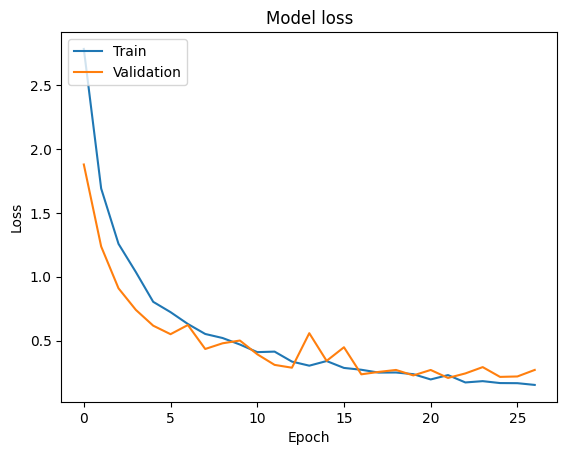

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Prediction

1/1 [==============================] - 0s 135ms/step


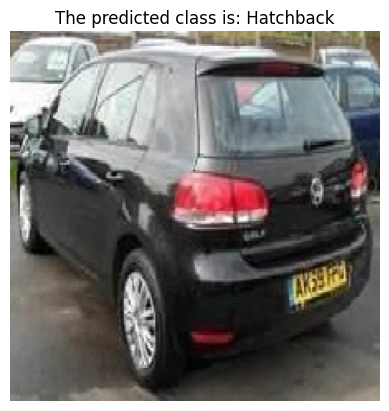

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

model_path = '/content/my_modelCNN2.h5'
try:
    model = load_model(model_path)
except Exception as e:
    print(f"Error loading the model from {model_path}: {str(e)}")
    exit()

# Function to preprocess the input image
def preprocess_image(image_path):
    try:
        img = image.load_img(image_path, target_size=(224, 224))
    except Exception as e:
        print(f"Error loading the image from {image_path}: {str(e)}")
        return None

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array, img

# Function to predict the class
def predict_class(image_path):
    processed_image, original_image = preprocess_image(image_path)
    if processed_image is None:
        return None

    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions)
    return predicted_class_index, original_image


image_path_to_predict = '/content/the car type(SUV, sedane, Hachback, truck)/valid/Hatchback/00196_Volkswagen-Golf-Hatchback-2012_jpg.rf.7bb70f2c23a54504ede5ead6385ae0f2.jpg'
predicted_class, original_image = predict_class(image_path_to_predict)

if predicted_class is not None:

    class_labels = {0: 'Hatchback', 1: 'SUV', 2: 'Sedan', 3: 'truck'}
    predicted_class_label = class_labels[predicted_class]


    plt.imshow(original_image)
    plt.title(f'The predicted class is: {predicted_class_label}')
    plt.axis('off')
    plt.show()
else:
    print("Prediction failed.")
